# Bathymetry Details

This is a simple example to show how to plot the model bathymetry. It uses cartopy, and the recently developed 0.1° topography.

This version focusses down on particular areas of interest.

**The problem I have found is that pcolormesh won't work properly with our geolon_t data -- making it difficult to use cartopy properly, especially in the tripolar region. This didn't seem to be a problem before, but it is now. Solution is probably just to make a proper longitude and latitude file, or to alter the way we write out data.**

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cft
import cmocean as cm
import IPython.display

netcdf_index loaded.


/home/157/amh157/.local/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
#file = '/g/data3/hh5/tmp/cosima/bathymetry/topog_latest.nc'
#data = nc.Dataset(file)
#depth = data.variables['depth'][:,:]

#file2 = '/g/data3/hh5/tmp/cosima/bathymetry/ocean_hgrid.nc'
#data2 = nc.Dataset(file2)
#lons = data2.variables['x'][::2,::2]
#lats = data2.variables['y'][::2,::2]

In [2]:
depth = cc.get_nc_variable('KDS75_newbathy_JRA','ocean_grid.nc','ht',n=1).isel(time=0)
lons = cc.get_nc_variable('KDS75_newbathy_JRA','ocean_grid.nc','geolon_t',n=1).isel(time=0)
lats = cc.get_nc_variable('KDS75_newbathy_JRA','ocean_grid.nc','geolat_t',n=1).isel(time=0)
IPython.display.clear_output()

Text(0.5,1,'ACCESS-OM2-01 Bathymetry')

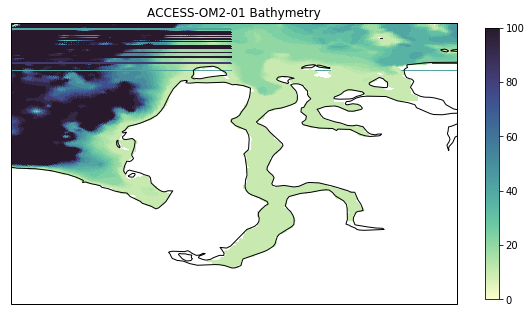

In [5]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=72))
ax.set_extent([62, 82, 65, 75])
ax.coastlines(resolution='50m')
#ax.add_feature(cft.LAND,color='gray')
plt.pcolormesh(lons, lats, depth, cmap=cm.cm.deep, vmin=0, vmax=100,transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.5)
plt.title('ACCESS-OM2-01 Bathymetry')
#plt.savefig('../../bathymetry.png',dpi=300)

[55, 75, 70, 90]

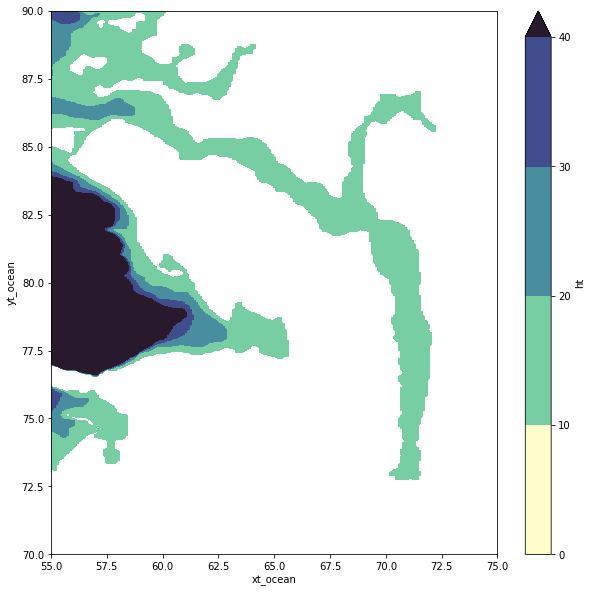

In [16]:
plt.figure(figsize=(10,10))
depth.plot.contourf(cmap=cm.cm.deep, levels=[0, 10, 20, 30, 40])
plt.axis([55, 75, 70, 90])